In [36]:
import copy, pyFAI
import numpy as numpy
import matplotlib.pyplot as plt

In [51]:
class MyIntegrator:
   def __init__(self, ponifile, npt=1000):
       self.npt = npt
       self.aipi = pyFAI.load(ponifile)
       #Initialize the integrator
       image = numpy.zeros(self.aipi.detector.shape)
       self.aipi.integrate1d(image, self.npt)
       #create the second-integrator
       self.ai0 = copy.deepcopy(self.aipi)
       self.ai0.setChiDiscAtZero()

   def integrate(self,image, angle=None, delta=None,npt=1000):
       print(angle,180-delta,-180+delta,360-delta)
       if angle is None:
            return self.aipi.integrate1d(image, npt)
       elif angle<180-delta and angle>-180+delta:
            print('Case Pi')
            return self.aipi.integrate1d(image, npt, azimuth_range=(angle-delta, angle+delta))
       elif angle>delta and angle<360-delta:
            print('Case Zero')
            return self.ai0.integrate1d(image, npt, azimuth_range=(angle-delta, angle+delta))

In [38]:
# Provide path to process folder that equals the output path
path_process='/data/visitors/nanomax/20190570/2019041008/process/Si_calibration_20190415/'
# Load the PONI file and the mask file
poni='PONI_Si_calibration_20190415.poni'  
mask='Mask_Si_calibration_20190415.edf'
ponifile=path_process+poni
maskfile=path_process+mask

In [52]:
test=MyIntegrator(ponifile)
image=numpy.zeros(test.aipi.detector.shape)
np.shape(image)

(1043, 981)

180 170 -170 350
Case Zero


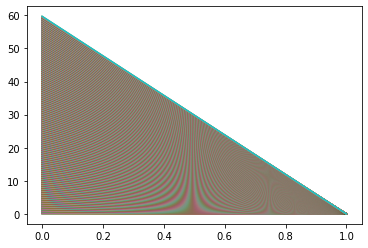

In [53]:
res=test.integrate(image,angle=180,delta=10,npt=1000)
plt.plot(res)
plt.show()